In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm


In [3]:
data_filename = "ceramic_lab.csv"
raw_data = pd.read_csv(data_filename, delimiter=",")

for col in raw_data.columns[1:]:
    raw_data[col] = raw_data[col].astype(float)
raw_data.columns

Index(['Part', 'SC Middle Flange OD, Operator 1 [in]',
       'SC Middle Flange OD, Operator 1 (repeat) [in]',
       'SC Middle Flange OD, Operator 2 [in]',
       'SC Middle Flange OD, Operator 2 (repeat) [in]',
       'F Moddle Boss Dia., Operator 3 [in]',
       'IC Flange Width, Operator 4 [in]'],
      dtype='object')

In [4]:
raw_data

,Part,"SC Middle Flange OD, Operator 1 [in]","SC Middle Flange OD, Operator 1 (repeat) [in]","SC Middle Flange OD, Operator 2 [in]","SC Middle Flange OD, Operator 2 (repeat) [in]","F Moddle Boss Dia., Operator 3 [in]","IC Flange Width, Operator 4 [in]"
0,1,1.813000,1.811000,1.811500,1.811500,1.27200,0.309000
1,2,1.812500,1.811500,1.812500,1.820000,1.26700,0.310000
2,3,1.818500,1.818500,1.817500,1.817500,1.27600,0.309000
3,4,1.811000,1.811000,1.809500,1.813000,1.27700,0.309000
4,5,1.818000,1.818000,1.816500,1.814500,1.26300,0.310000
5,6,1.813500,1.816500,1.812000,1.811000,1.27400,0.310000
6,7,1.807500,1.805500,1.805500,1.809500,1.27200,0.309000
7,8,1.810500,1.810000,1.806500,1.812000,1.27800,0.309000
8,9,1.805500,1.806000,1.806500,1.803500,1.28000,0.312000
9,10,1.821500,1.823000,1.821500,1.824000,1.26600,0.309000


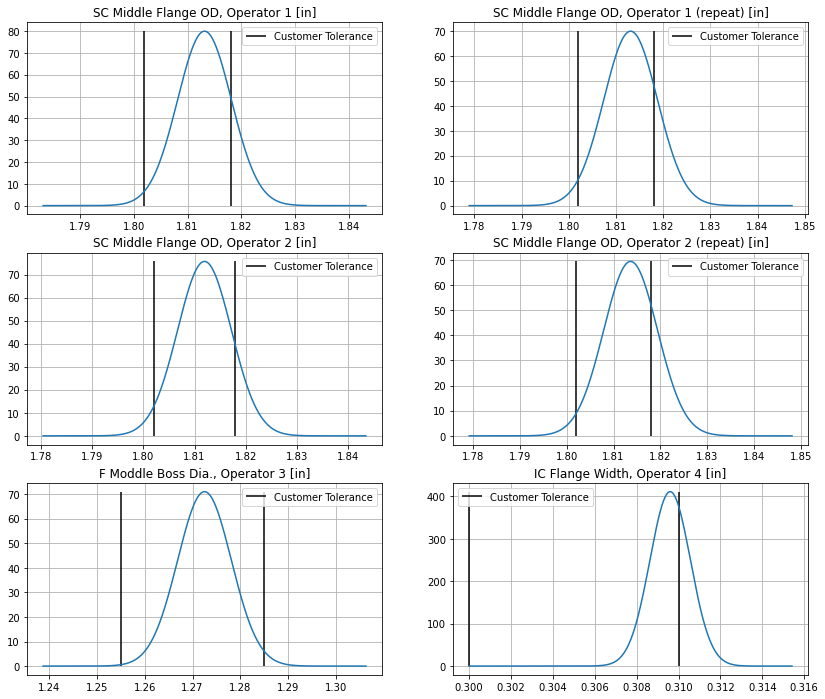

In [20]:
fig = plt.figure(figsize=(14,12))
nrows=3; ncols=2
for i, col in enumerate(raw_data.columns[1:]):
    fig.add_subplot(nrows, ncols, i+1)
    ax = plt.gca()
    mean = raw_data.loc[10, col]
    std = raw_data.loc[11, col]
    lsl = raw_data.loc[14, col]
    usl = raw_data.loc[15, col]
    deviations = 6
    x_min = min(lsl, mean-deviations*std)
    x_max = max(usl, mean+deviations*std)
    x_axis = np.linspace(x_min, x_max, 1000)
    y_norm = norm.pdf(x_axis, mean, std)
    ax.plot(x_axis, y_norm)
    ax.vlines([lsl,usl], ymin=0, ymax=np.max(y_norm), color="black", label="Customer Tolerance")
    ax.set_title(col)
    ax.legend()
    ax.grid()
